# Stage 1.1

---

### _Content_:

1. Data Generation
2. Preprocessing the dataset
3. Pre-Training Setup
4. Training
5. Evaluation & Visualization
 
### _Requirements_:

1. numpy
2. matplotlib
3. scikit-learn

---

In [274]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Generation

In [275]:
# Set a global seed for reproducibility (To get the same random initializations)
np.random.seed(42)

In [276]:
# Assign the constants
N_SAMPLES = 100
N_INPUT_FEATURES = 1
N_OUTPUT_FEATURES = 1

In [277]:
w_random = np.random.rand() * 100 - 50 # range = [-50, 50)
b_random = np.random.rand() * 100 - 50 # range = [-50, 50)

X = np.random.normal(loc=0, scale=1, size=(N_SAMPLES, N_INPUT_FEATURES))
y = X * w_random + b_random + np.random.normal(loc=0, scale=1, size=X.shape) # Adding the noise

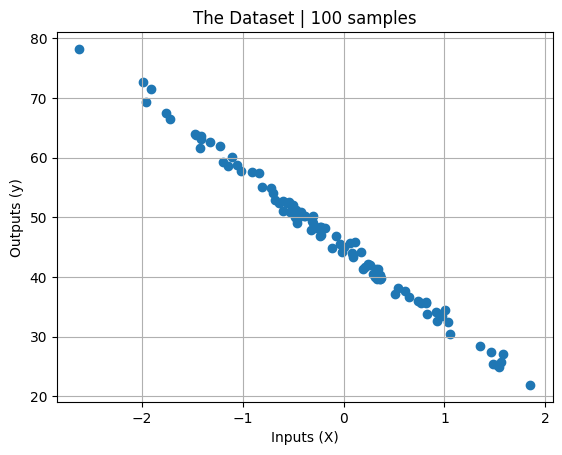

In [278]:
plt.scatter(X, y)
plt.title(f"The Dataset | {N_SAMPLES} samples")
plt.xlabel('Inputs (X)')
plt.ylabel('Outputs (y)')
plt.grid(True)
plt.show()

## 2. Preprocessing the dataset

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3. Pre-Training Setup

Using MSE (Mean Squared Error as a loss function)

In [281]:
def compute_loss(y_pred, y_real):
    errors = y_pred - y_real
    return np.mean(errors**2)

In [282]:
def compute_gradients(y_pred, y_real, X):
    errors = y_pred - y_real
    n = len(X)
    w_gradient = 2 / n * np.sum(errors * X)
    b_gradient = 2 / n * np.sum(errors)
    return {"w": w_gradient, "b": b_gradient}

In [283]:
class Optimizer:
    """
    An optimizer class with a learning rate scheduler that increases the learning rate by a decay value each epoch.
    """

    def __init__(self, w, b, learning_rate=0.0001, decay=0.05):
        self.w = w
        self.b = b
        self.lr = learning_rate
        self.decay = decay

    def step(self, epoch, w_gradient, b_gradient):
        self.lr = self.lr * (1 + self.decay)
        self.w -= w_gradient * self.lr
        self.b -= b_gradient * self.lr

    def get_params(self):
        return {"w": self.w, "b": self.b}

In [284]:
history = {"epoch": [], "loss": [], "w": [], "b": []}

## 4. Training

In [285]:
MAX_EPOCHS: int = 200
MIN_LOSS: float = 0.9
LEARNING_RATE: float = 0.0001
DECAY: float = 0.05

In [286]:
epoch: int = 0
w: float = np.random.rand() + 0.1  # 0.1 is to avoid 0
b: float = np.random.rand() + 0.1  # range = [0.1, 1.1)

my_optimizer = Optimizer(w=w, b=b, learning_rate=LEARNING_RATE, decay=DECAY)

while True:

    # Get parameters from Optimizer
    params = my_optimizer.get_params()
    w = params["w"]
    b = params["b"]
    

    # Forward pass
    y_pred = X_train * w + b
    loss = compute_loss(y_pred=y_pred, y_real=y_train)

    if loss <= MIN_LOSS or epoch >= MAX_EPOCHS:
        break

    # Backward pass
    gradients = compute_gradients(y_pred=y_pred, y_real=y_train, X=X_train)
    w_gradient = gradients["w"]
    b_gradient = gradients["b"]

    # Optimization
    my_optimizer.step(epoch=epoch, w_gradient=w_gradient, b_gradient=b_gradient)
    epoch += 1

    history["epoch"].append(epoch)
    history["loss"].append(loss)
    history["w"].append(w)
    history["b"].append(b)


print(f"Training Finished:\t Epoch: {epoch} | Loss: {loss}")

Training Finished:	 Epoch: 144 | Loss: 0.8978101575480659


## 5. Evaluation & Visualization

### Training

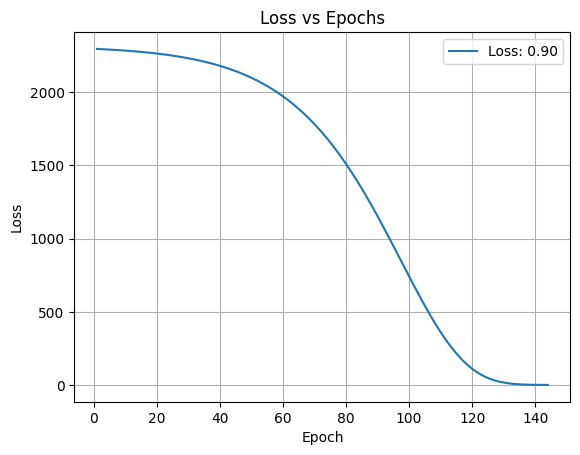

In [287]:
plt.plot(history['epoch'], history['loss'], label=f'Loss: {loss:.2f}')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

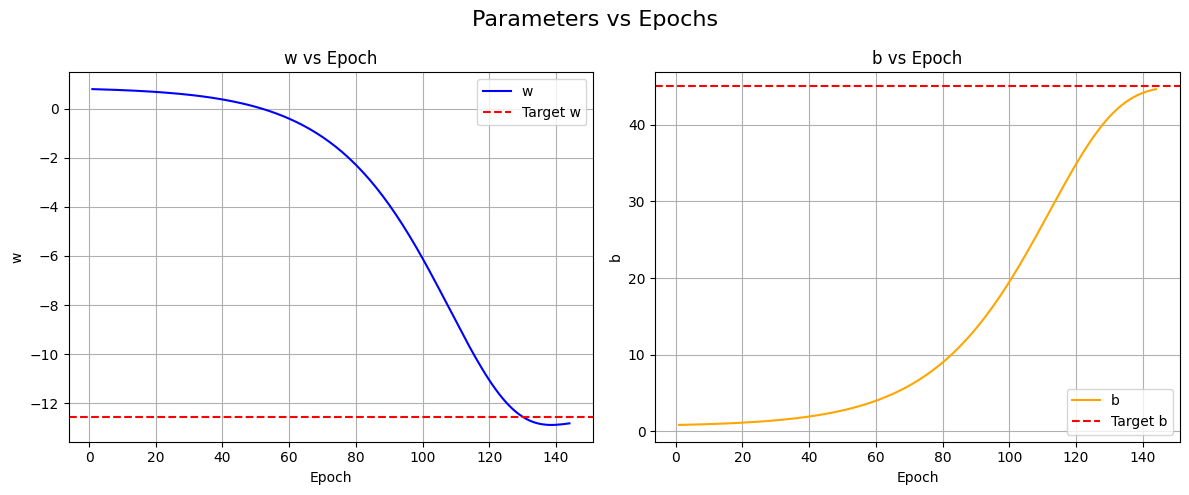

In [290]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 1. w vs Epoch
# 2. b vs Epoch

ax[0].plot(history["epoch"], history["w"], label="w", color="blue")
ax[0].axhline(y=w_random, color="r", linestyle="--", label="Target w")
ax[0].set_title("w vs Epoch")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("w")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history["epoch"], history["b"], label="b", color="orange")
ax[1].axhline(y=b_random, color="r", linestyle="--", label="Target b")
ax[1].set_title("b vs Epoch")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("b")
ax[1].legend()
ax[1].grid(True)


plt.suptitle("Parameters vs Epochs", fontsize=16)
plt.tight_layout()
plt.show()

### Testing

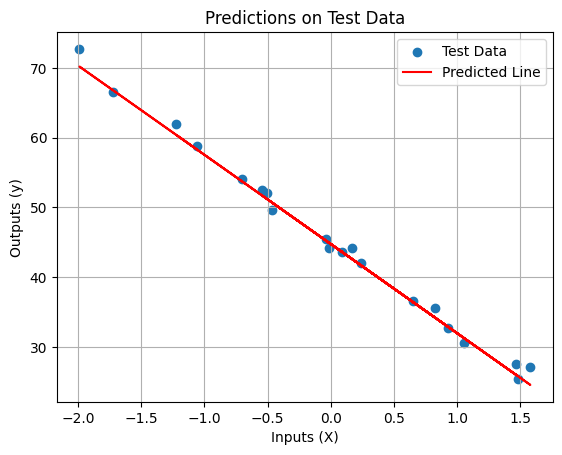

In [289]:
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, X_test * w+ b, color='red', label="Predicted Line")
plt.title("Predictions on Test Data")
plt.xlabel("Inputs (X)")
plt.ylabel("Outputs (y)")
plt.legend()
plt.grid(True)
plt.show()